Number of stocks to analyze: 4
Enter the ticker of stock number 1: UBSG.SW
Enter the ticker of stock number 2: LONN.SW
Enter the ticker of stock number 3: NESN.SW
Enter the ticker of stock number 4: SREN.SW
Enter the start date of the analysis period in the format YYYY-MM-DD: 2014-1-1
Enter the end date of the analysis period in the format YYYY-MM-DD: 2018-12-31


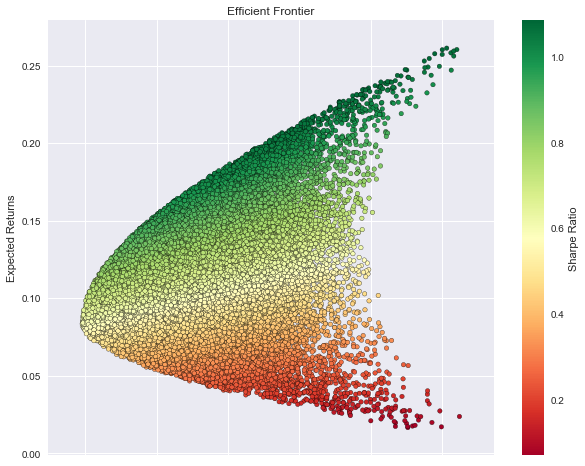

In [15]:
# import needed modules
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# get user's desired stocks
n = int(input("Number of stocks to analyze: "))
stocks = [] 
for i in range(n):
    stocks.append(input('Enter the ticker of stock number %i: ' %(i+1)))

# sort stock in alphabetical order for calculation's sake
stocks.sort()

# get user's desired period of analysis
start_date = input("Enter the start date of the analysis period in the format YYYY-MM-DD: ")
end_date = input("Enter the end date of the analysis period in the format YYYY-MM-DD: ")

# download adjusted closing price for each stock from Yahoo Finance
data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
data.sort_index(inplace=True)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and annual covariance of returns of the stocks
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# create empty lists to store returns, volatility, sharpe ratio and weights of random portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for random portfolios
num_assets = len(stocks)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# calculate for each random portfolio return, risk(volatility), sharpe ratio and weights; and store the results in the corresponding list 
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# set a dictionary for returns, risk(volatility) and sharpe ratio of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend the dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot coloured by the sharpe Ratio
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()